[View in Colaboratory](https://colab.research.google.com/github/gbaeke/xylosai/blob/master/regression/Polynomial_Regression.ipynb)

Example of a polynomial of the nth degree:

$f(x) = w_nx^2 + ... + w_1x + w_0$

When n=1, you just have a linear function


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
lr = 0.01
epochs = 40

In [0]:
x_train = np.linspace(-1, 1, 101)
# note: could have used a loop to build this; but manual is clearer
num_coeffs = 7
y_train = np.power(x_train, 1) + 2 * np.power(x_train, 2) + 3 * np.power(x_train, 3) + \
  4 * np.power(x_train, 4) + 5 * np.power(x_train, 5) + 6 * np.power(x_train, 6)  + 7 * np.power(x_train, 7)
y_train += np.random.randn(*x_train.shape) * 1.3

<function matplotlib.pyplot.show>

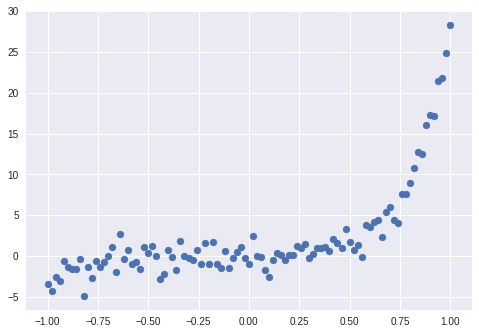

In [10]:
plt.scatter(x_train, y_train)
plt.show

In [0]:
# placeholders for X and Y data
# we will use feed_dict to feed x_train and y_train to these placeholders
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [0]:
# definition of the model
def model(X,w):
  # note that w is not just one value but a list of values
  # there are num_coeffs values in the list (7)
  terms=[]
  for i in range(num_coeffs):
    term = tf.multiply(w[i], tf.pow(X,i)) # term of polynomial
    terms.append(term)
  return tf.add_n(terms) # add all terms element-wise



In [0]:
# variable for all weights
w = tf.Variable([0.] * num_coeffs, name = "params")

# our model
y_model = model(X,w)

In [0]:
# cost function
cost = tf.pow(Y-y_model, 2)

In [0]:
#define train operation
train_op = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [44]:
#let the training start
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epochs):
  for (x,y) in zip(x_train, y_train):
    sess.run(train_op, feed_dict={X: x, Y: y})
  
w_val = sess.run(w)
print(w_val)

[-0.1770524 -0.5920483  3.043064   6.8615117  4.2210574  8.18779
  4.4349785]


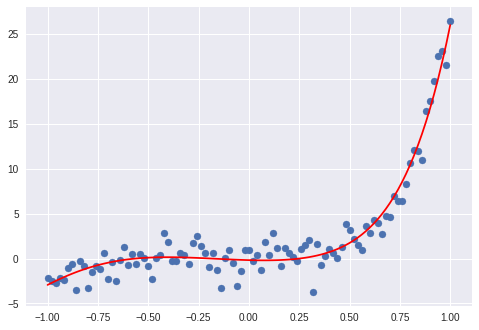

In [45]:
plt.scatter(x_train, y_train)                                                 
trY2 = 0                                                                  
for i in range(num_coeffs):                                                
    trY2 += w_val[i] * np.power(x_train, i)                                    
                                                                           
plt.plot(x_train, trY2, 'r')                                                   
plt.show()     

In [0]:
# let's try this with scikit learn
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=7, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))


In [32]:
# our original 1st feature
x_train[1]

-0.98

In [33]:
# 1st poly feature -0.98^7=-0,86812553324672
x_train_poly[1]

array([-0.98      ,  0.9604    , -0.941192  ,  0.92236816, -0.9039208 ,
        0.88584238, -0.86812553])

In [38]:
# now we do linear regression with these polynomial features
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(fit_intercept=False)
lin_reg.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [41]:
# what are the weights according to scikit learn?
lin_reg.coef_

(array([  0.91011474,   3.06768926,  -5.74741655,  -1.26776179,
         33.06464205,  10.53883599, -13.95243685]), 0.0)

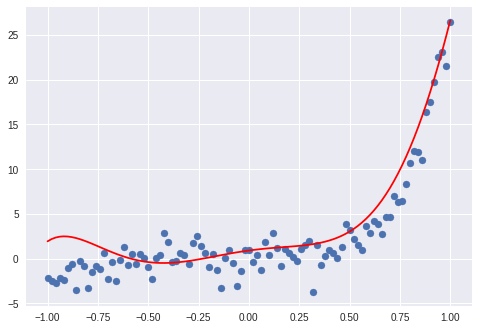

In [42]:
# result is quite different why?
plt.scatter(x_train, y_train)                                                 
trY2 = 0                                                                  
for i in range(num_coeffs):                                                
    trY2 += lin_reg.coef_[i] * np.power(x_train, i)                                    
                                                                           
plt.plot(x_train, trY2, 'r')                                                   
plt.show()     